In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

from sklearn.linear_model import LogisticRegression



In [ ]:
data = pd.read_csv('/content/tested.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data.count().sum()

4602

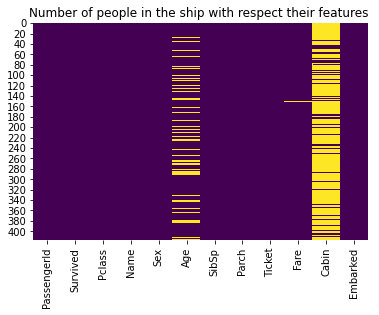

In [ ]:
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people in the ship with respect their features ')
plt.show()

In [ ]:
data['Age'].isnull().sum()/data.shape[0]*100

20.574162679425836

In [ ]:
data['Cabin'].isnull().sum()/data.shape[0]*100

78.22966507177034

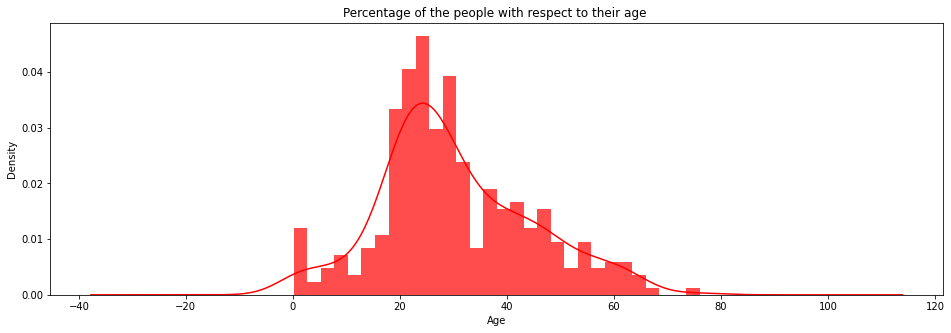

In [ ]:
ax = data['Age'].hist(bins = 30, density = True, stacked = True, color = 'red', alpha = 0.7, figsize = (16, 5))
data['Age'].plot(kind = 'density', color = 'red')
ax.set_xlabel('Age')
plt.title('Percentage of the people with respect to their age ')
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

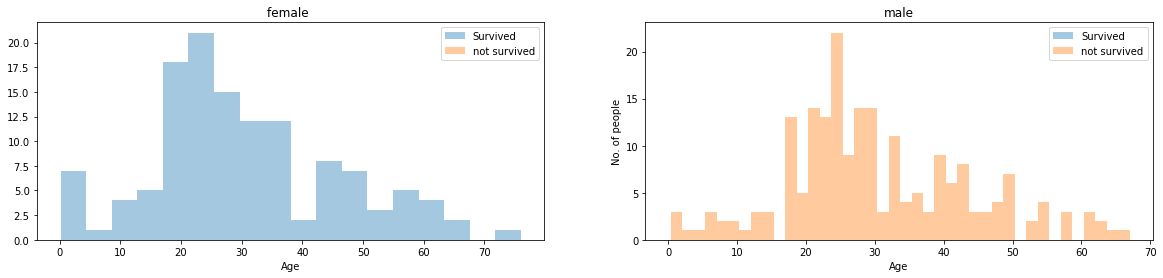

In [ ]:
Survived = 'Survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
women =data[data['Sex'] == 'female']
men =data[data['Sex'] == 'male']

ax = sns.distplot(women[women[Survived]==1].Age.dropna(), bins = 18, label = Survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[Survived]==0].Age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('female ')
ax = sns.distplot(men[men[Survived]==1].Age.dropna(), bins = 18, label = Survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[Survived]==0].Age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('male')
plt.ylabel('No. of people')
plt.show()

In [ ]:
data['Sex'].value_counts()



male      266
female    152
Name: Sex, dtype: int64

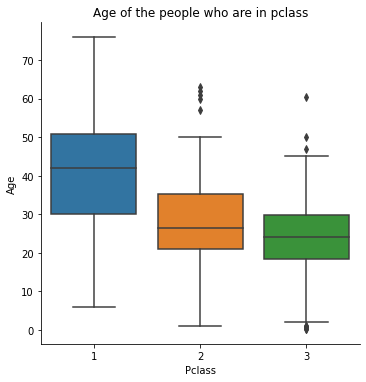

In [ ]:
sns.catplot(x = data.Pclass, y = 'Age', data = data, kind = 'box')
plt.title('Age of the people who are in pclass')
plt.show()


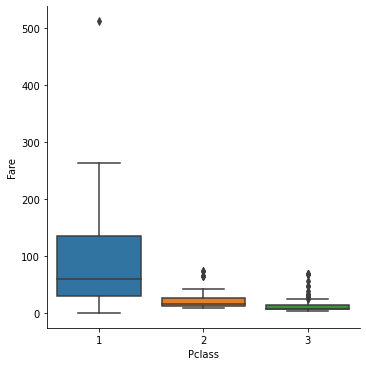

In [ ]:
sns.catplot(x = 'Pclass', y = 'Fare', data = data, kind = 'box')

In [ ]:
data[data['Pclass'] == 1]['Age'].mean()

40.91836734693877

In [ ]:
data[data['Pclass'] == 2]['Age'].mean()

28.7775

In [ ]:
data[data['Pclass'] == 3]['Age'].mean()

24.02794520547945

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return data[data['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return data[data['Pclass'] == 2]['Age'].mean()
        elif Pclass == 3:
            return data[data['Pclass'] == 3]['Age'].mean()
        
    else:
        return Age

In [ ]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis = 1)

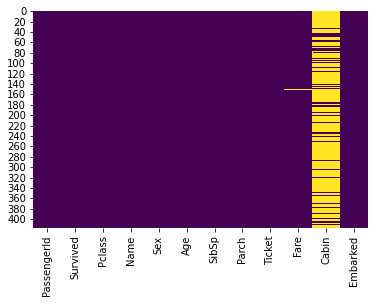

In [ ]:
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')



In [ ]:
data.drop((f"{labels[mask]} =['Cabin', 'Embarked','Fare'], inplace = True, Axis =1))

SyntaxError: ignored

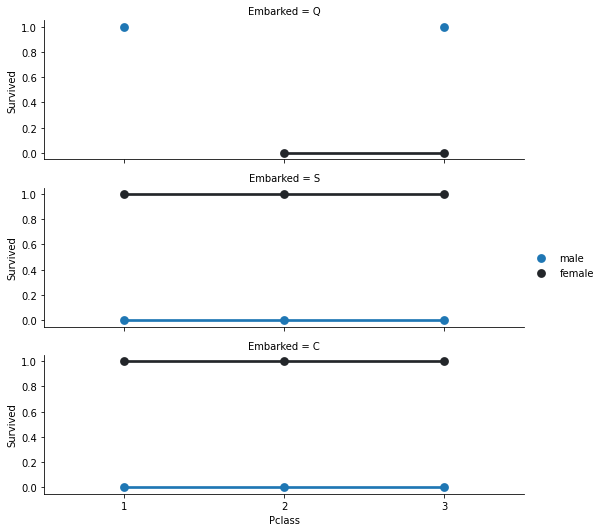

In [ ]:
f = sns.FacetGrid(data, row = 'Embarked', height = 2.5, aspect= 3)
f.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = None, hue_order = None)
f.add_legend()
plt.show()


In [ ]:
data['Embarked'].isnull().sum()

0

In [ ]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
common_value = 'S'
data['Embarked'].fillna(common_value, inplace = True) data['Embarked'].isnull().sum()

SyntaxError: ignored

In [ ]:


sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

In [ ]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace = True, axis = 1)

In [ ]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

In [ ]:
titanic.info()

In [ ]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')
titanic.info()

In [ ]:
genders = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)
who = {'man': 0, 'women': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who)
adult_male = {True: 1, False: 0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)
alone = {True: 1, False: 0}
titanic['alone'] = titanic['alone'].map(alone)            ports = {'S': 0, 'C': 1, 'Q': 2}
titanic['embarked'] = titanic['embarked'].map(ports)  titanic.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)                           model = LogisticRegression(solver= 'lbfgs', max_iter = 400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.score(X_test, y_test)

In [48]:

from sklearn.model_selection import train_test_split
from skleran.model_selection import train_test_split

ModuleNotFoundError: ignored